#**#Problem Statement**
To predict the mortgage backed securities prepayement risk using ML

###Data exploration
1.importing the libraries required for analysis

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data=pd.read_csv("/content/drive/MyDrive/data/LoanExport.csv")
data.head()

<ipython-input-5-026e45c642d3>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/data/LoanExport.csv")


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [6]:
df=pd.DataFrame(data)
df.shape

(291451, 28)

In [7]:
df.describe

<bound method NDFrame.describe of         CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  379

##Data Cleaning
1.The data is primarily cleaned first.


2.This means that the rows with null values are removed, the unwanted columns are dropped from the dataset etc.

In [8]:
df.columns[df.isna().any()]
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [9]:
df.SellerName.unique()

array(['FL', 'FT', 'GM', 'Ot', 'RE', 'NO', 'ST', 'CR', 'CH', 'FI', 'HO',
       'PR', nan, 'PN', 'WA', 'BA', 'G ', 'OL', 'AC', 'CO', 'BI'],
      dtype=object)

In [10]:
unwanted_columns = ['LoanSeqNum','SellerName','ServicerName','PostalCode']
df.drop(columns=unwanted_columns, inplace=True)
print("\nUpdated DataFrame:")
print(df)


Updated DataFrame:
        CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

       

In [11]:
print(df.nunique())
print(df.shape)

CreditScore           370
FirstPaymentDate       66
FirstTimeHomebuyer      3
MaturityDate           96
MSA                   392
MIP                    37
Units                   5
Occupancy               3
OCLTV                 102
DTI                    66
OrigUPB               375
LTV                    97
OrigInterestRate      254
Channel                 4
PPM                     3
ProductType             1
PropertyState          53
PropertyType            7
LoanPurpose             3
OrigLoanTerm           61
NumBorrowers            3
EverDelinquent          2
MonthsDelinquent      174
MonthsInRepayment     212
dtype: int64
(291451, 24)


##Data Encoding

In [12]:
encode = LabelEncoder()
list_transform = ['FirstTimeHomebuyer','Occupancy','Channel','PPM','LoanPurpose']
for i in list_transform:
    df[i] = encode.fit_transform(df[i])
df['NumBorrowers'].unique()

array(['2', '1', 'X '], dtype=object)

In [13]:
df['MaturityDate'] = df['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

<Axes: >

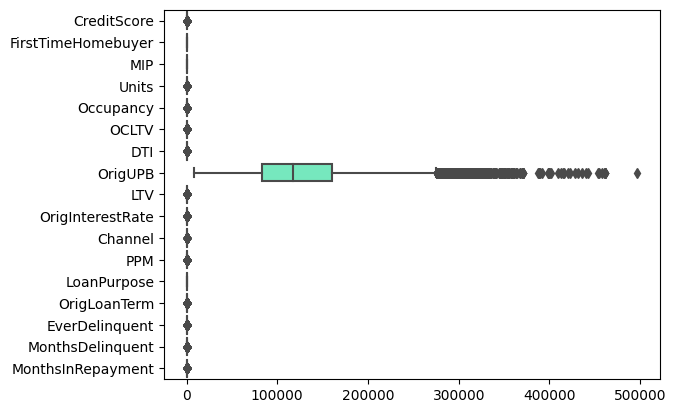

In [14]:
#Visualizing Outliers
def boxplot(col):
  sns.boxplot(data[col])

sns.boxplot(data=df,palette='rainbow',orient='h')

check whether any duplicates values

In [15]:
duplicate=data.duplicated()
print(duplicate.sum())

0


#Correlation

In [16]:

df.corr()

<ipython-input-16-7e6697e05da5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,LoanPurpose,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
CreditScore,1.000000,-0.038029,-0.164376,0.002808,0.002497,-0.190848,-0.098740,0.003770,-0.191080,-0.119472,0.007633,0.008359,-0.010079,-0.008075,-0.207204,-0.150266,-0.005127
FirstTimeHomebuyer,-0.038029,1.000000,0.123660,0.004864,-0.003157,0.128751,-0.081417,-0.039770,0.129092,0.006967,-0.051348,-0.024497,0.081933,0.011423,0.009156,0.015211,0.006661
MIP,-0.164376,0.123660,1.000000,-0.042111,0.044397,0.694789,0.111603,0.006729,0.695888,0.124544,-0.035503,-0.022119,0.444857,0.014834,0.059993,0.051204,-0.087802
Units,0.002808,0.004864,-0.042111,1.000000,-0.204041,-0.046133,0.012887,0.043827,-0.046032,0.074070,0.002283,-0.003105,-0.015747,0.005348,0.010163,-0.004573,0.025594
Occupancy,0.002497,-0.003157,0.044397,-0.204041,1.000000,0.049278,-0.000737,0.049724,0.049273,-0.158914,-0.017481,-0.008040,0.043213,-0.007625,-0.012291,-0.001255,-0.018539
OCLTV,-0.190848,0.128751,0.694789,-0.046133,0.049278,1.000000,0.114853,0.106273,0.999470,0.095268,-0.013396,-0.010452,0.419111,0.018560,0.065528,0.059811,-0.094299
DTI,-0.098740,-0.081417,0.111603,0.012887,-0.000737,0.114853,1.000000,0.063640,0.114468,0.105216,-0.040499,-0.004844,0.044237,0.028005,0.062109,0.040830,-0.007732
OrigUPB,0.003770,-0.039770,0.006729,0.043827,0.049724,0.106273,0.063640,1.000000,0.105722,-0.128563,0.087512,-0.037149,0.036861,-0.008008,-0.067605,-0.067243,-0.211698
LTV,-0.191080,0.129092,0.695888,-0.046032,0.049273,0.999470,0.114468,0.105722,1.000000,0.095520,-0.012719,-0.010455,0.419064,0.018477,0.065735,0.059930,-0.094596
OrigInterestRate,-0.119472,0.006967,0.124544,0.074070,-0.158914,0.095268,0.105216,-0.128563,0.095520,1.000000,0.008016,0.038771,0.024652,0.010794,0.060418,0.051706,-0.120378


###Generate correlation matrix






*  set figure size
*   create the heatmap with correlation matrix



<ipython-input-17-1ef66550158a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


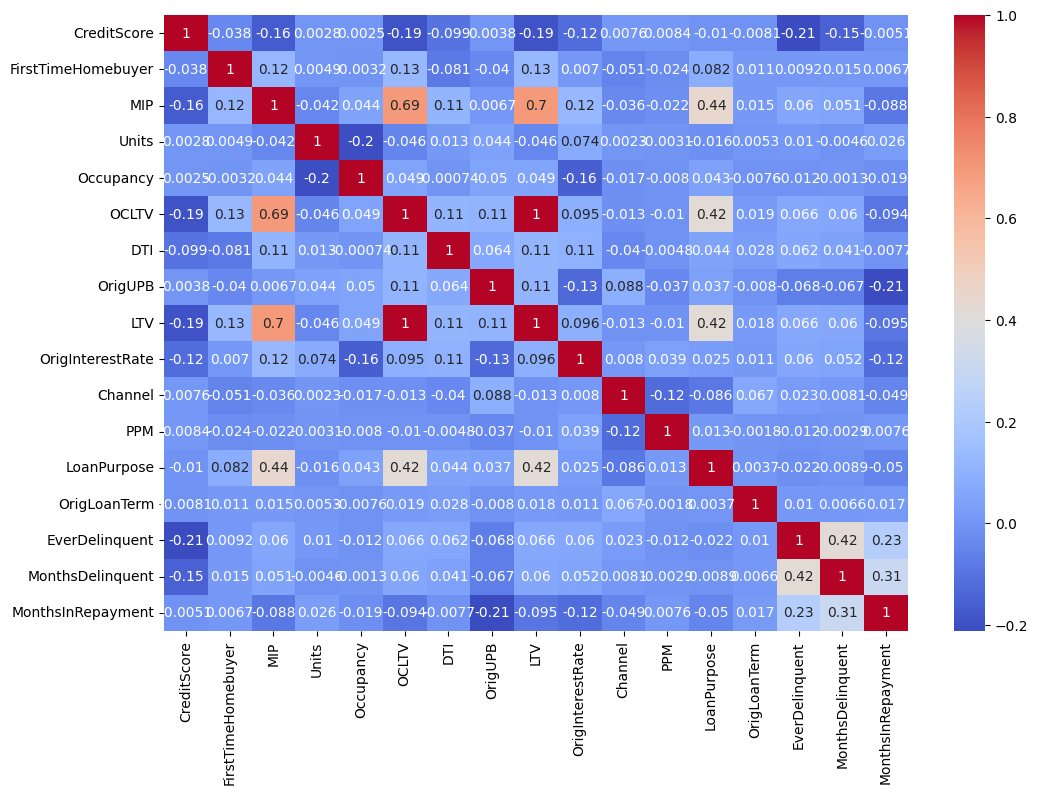

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
# Show plot
plt.show()

In [18]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [19]:
df.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)
df.drop(["FirstPaymentDate","MaturityDate"],axis=1,inplace=True)
 #Timestamp
x=df.drop(['EverDelinquent'], axis=1)
y=df['EverDelinquent']

In [20]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: EverDelinquent, dtype: int64